<a href="https://colab.research.google.com/github/karaogluhh/Computer-Vision-Notes/blob/main/OpenCV_Tutorials_Geometric_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Here are the signatures and parameter definitions for the OpenCV transformation functions used in this notebook:

*   **`cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`**
    *   `src`: Input image.
    *   `M`: 2x3 transformation matrix.
    *   `dsize`: Size of the output image (width, height).
    *   `dst`: Output image (optional).
    *   `flags`: Combination of interpolation methods (e.g., `cv2.INTER_LINEAR`, `cv2.INTER_CUBIC`) and the optional flag `cv2.WARP_INVERSE_MAP`.
    *   `borderMode`: Pixel extrapolation method (e.g., `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`).
    *   `borderValue`: Value used in case of a constant border; by default, it is 0.

*   **`cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`**
    *   `src`: Input image.
    *   `M`: 3x3 transformation matrix.
    *   `dsize`: Size of the output image (width, height).
    *   `dst`: Output image (optional).
    *   `flags`: Combination of interpolation methods (e.g., `cv2.INTER_LINEAR`, `cv2.INTER_CUBIC`) and the optional flag `cv2.WARP_INVERSE_MAP`.
    *   `borderMode`: Pixel extrapolation method (e.g., `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`).
    *   `borderValue`: Value used in case of a constant border; by default, it is 0.

*   **`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`**
    *   `src`: Input image.
    *   `dsize`: Output image size (width, height). If it is zero, it is computed as: `dsize = Size(round(fx*src.cols), round(fy*src.rows))`.
    *   `dst`: Output image (optional).
    *   `fx`: Factor by which the image size is scaled along the horizontal axis.
    *   `fy`: Factor by which the image size is scaled along the vertical axis.
    *   `interpolation`: Interpolation method (e.g., `cv2.INTER_NEAREST`, `cv2.INTER_LINEAR`, `cv2.INTER_CUBIC`, `cv2.INTER_AREA`, `cv2.INTER_LANCZOS4`).

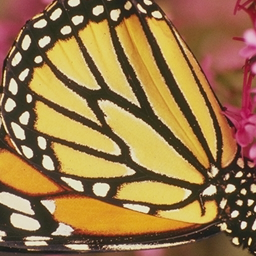

In [3]:
im = cv2.imread("butterfly.png")
cv2_imshow(im)

## Scaling

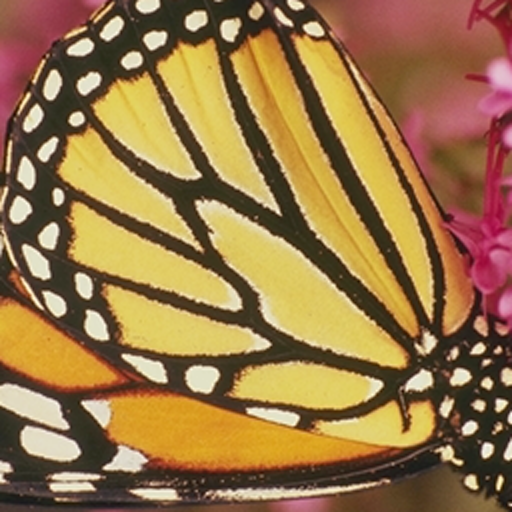

In [4]:
im_resized = cv2.resize(im, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2_imshow(im_resized)

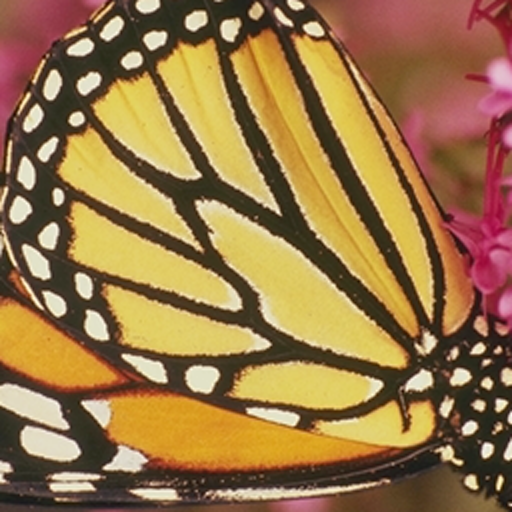

In [6]:
h, w = im.shape[:2]
im_resized2 = cv2.resize(im, (2 * w, 2 * h), interpolation=cv2.INTER_CUBIC)
cv2_imshow(im_resized2)

## Translation

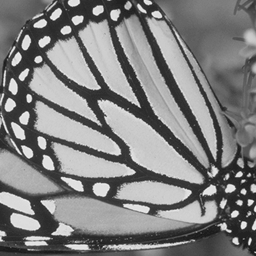

In [7]:
im_gray = cv2.imread("butterfly.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(im_gray)

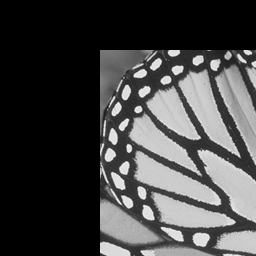

In [10]:
rows, cols = im_gray.shape
M = np.float32([[1, 0, 100],[0, 1, 50]])
dst = cv2.warpAffine(im_gray, M, (cols, rows))
cv2_imshow(dst)

## Rotation

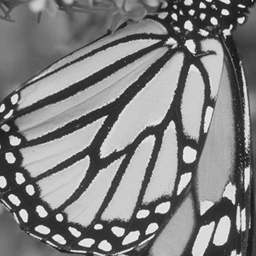

In [11]:
rows, cols = im_gray.shape
M = cv2.getRotationMatrix2D(((cols-1)/2.0 , (rows-1)/2.0), 90, 1)
dst = cv2.warpAffine(im_gray, M, (cols, rows))
cv2_imshow(dst)

## Affine Transformation

In [18]:
list(plt.colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

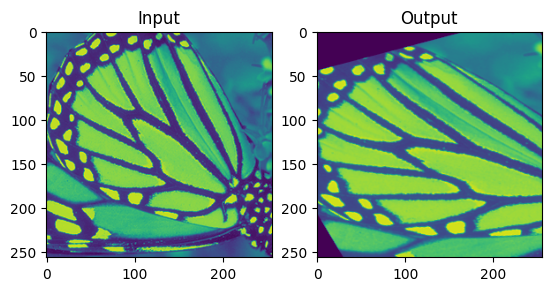

In [15]:
rows, cols = im_gray.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(im_gray, M, (cols, rows))

plt.subplot(121), plt.imshow(im_gray), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()
plt.colormaps()

## Perspective Transformation

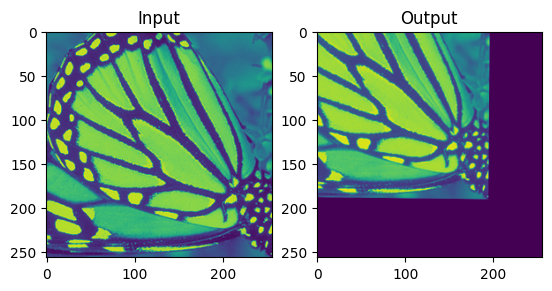

In [20]:
rows, cols = im_gray.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(im_gray, M, (cols, rows))

plt.subplot(121),plt.imshow(im_gray),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()